<a href="https://colab.research.google.com/github/Sravani0823/6220-project/blob/main/Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret==3.0.0

  Using cached pycaret-3.0.0-py3-none-any.whl (481 kB)
  Attempting uninstall: pycaret
    Found existing installation: pycaret 3.2.0
    Uninstalling pycaret-3.2.0:
      Successfully uninstalled pycaret-3.2.0


In [2]:
from pycaret.utils import version
version()

'3.0.0'

In [3]:
pip install matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [6]:
from google.colab import files
df= files.upload()

Saving Loan_Data.csv to Loan_Data (1).csv


In [7]:
import io
df = pd.read_csv(r'Loan_Data.csv')
df.head(15)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0   LP001002   Male      No          0      Graduate            No   
1   LP001003   Male     Yes          1      Graduate            No   
2   LP001005   Male     Yes          0      Graduate           Yes   
3   LP001006   Male     Yes          0  Not Graduate            No   
4   LP001008   Male      No          0      Graduate            No   
5   LP001011   Male     Yes          2      Graduate           Yes   
6   LP001013   Male     Yes          0  Not Graduate            No   
7   LP001014   Male     Yes         3+      Graduate            No   
8   LP001018   Male     Yes          2      Graduate            No   
9   LP001020   Male     Yes          1      Graduate            No   
10  LP001024   Male     Yes          2      Graduate            No   
11  LP001027   Male     Yes          2      Graduate            No   
12  LP001028   Male     Yes          2      Graduate            No   
13  LP001029   Male      No          0      Graduate            No   
14  LP001030   Male     Yes          2      Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              5849                0.0           0               360   
1              4583             1508.0         128               360   
2              3000                0.0          66               360   
3              2583             2358.0         120               360   
4              6000                0.0         141               360   
5              5417             4196.0         267               360   
6              2333             1516.0          95               360   
7              3036             2504.0         158               360   
8              4006             1526.0         168               360   
9             12841            10968.0         349               360   
10             3200              700.0          70               360   
11             2500             1840.0         109               360   
12             3073             8106.0         200               360   
13             1853             2840.0         114               360   
14             1299             1086.0          17               120   

    Credit_History Property_Area  Loan_Status  
0                1         Urban            1  
1                1         Rural            0  
2                1         Urban            1  
3                1         Urban            1  
4                1         Urban            1  
5                1         Urban            1  
6                1         Urban            1  
7                0     Semiurban            0  
8                1         Urban            1  
9                1     Semiurban            0  
10               1         Urban            1  
11               1         Urban            1  
12               1         Urban            1  
13               1         Rural            0  
14               1         Urban            1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            612 non-null    object 
 1   Gender             612 non-null    object 
 2   Married            612 non-null    object 
 3   Dependents         612 non-null    object 
 4   Education          612 non-null    object 
 5   Self_Employed      612 non-null    object 
 6   ApplicantIncome    612 non-null    int64  
 7   CoapplicantIncome  612 non-null    float64
 8   LoanAmount         612 non-null    int64  
 9   Loan_Amount_Term   612 non-null    int64  
 10  Credit_History     612 non-null    int64  
 11  Property_Area      612 non-null    object 
 12  Loan_Status        612 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 62.3+ KB


# Checking for Duplicate values

In [9]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [10]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


# Exploratory Analysis

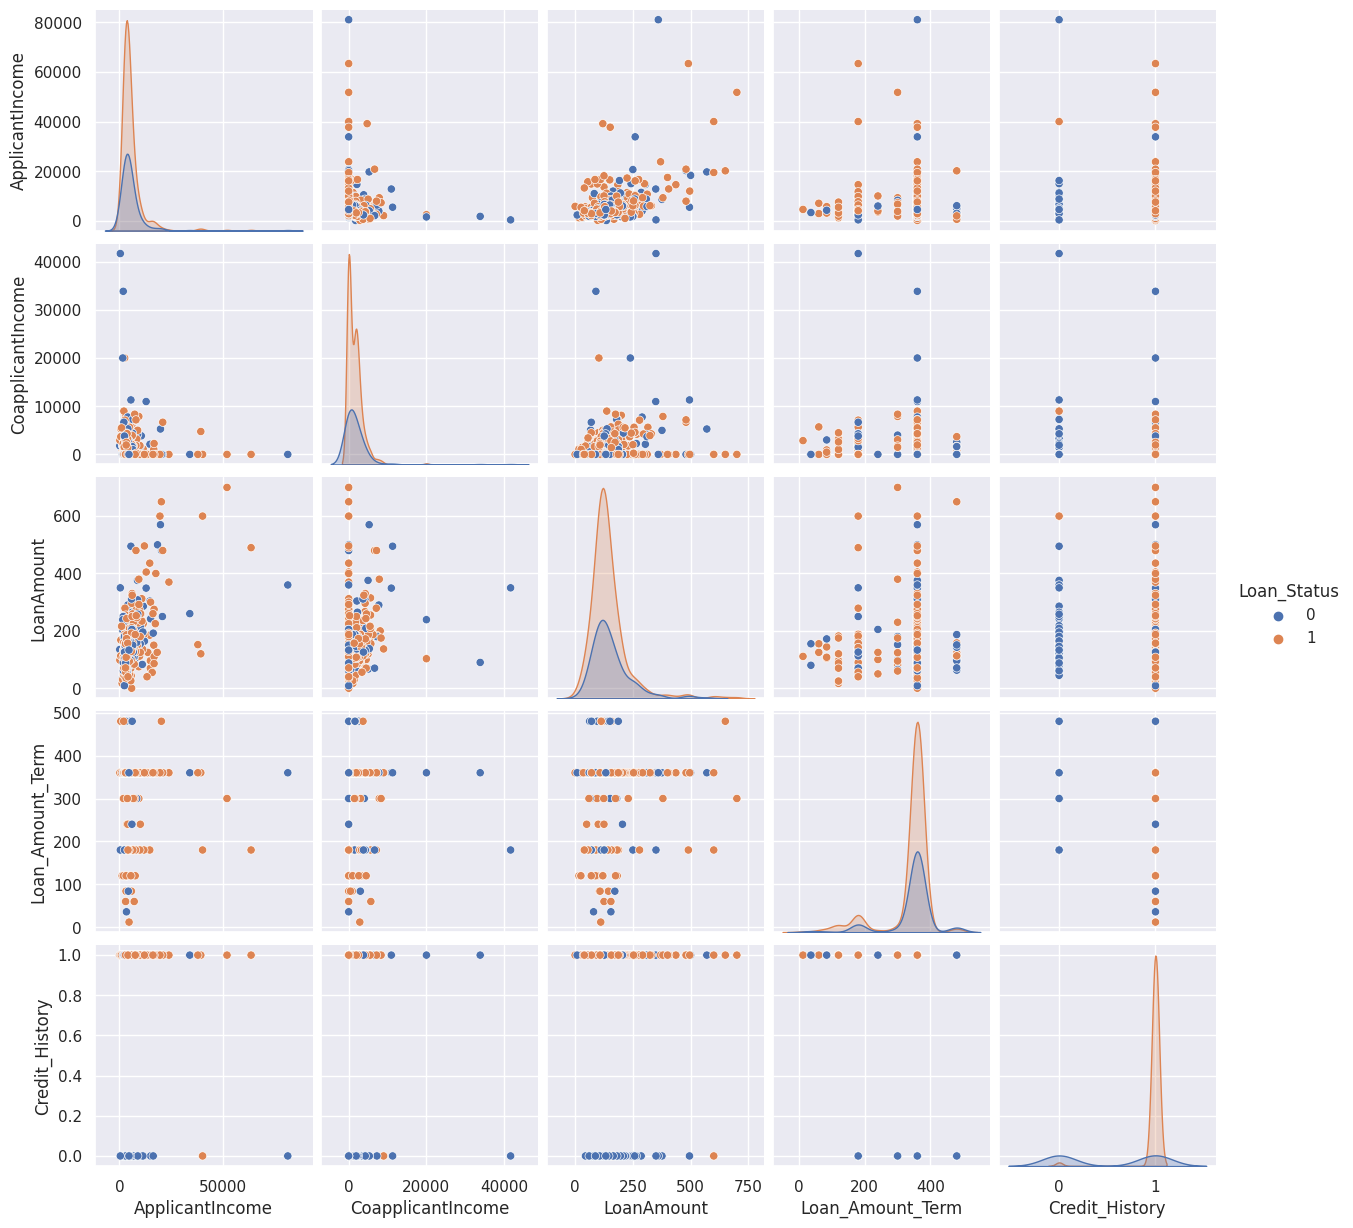

In [11]:
sns.pairplot(df, hue='Loan_Status')
plt.show()

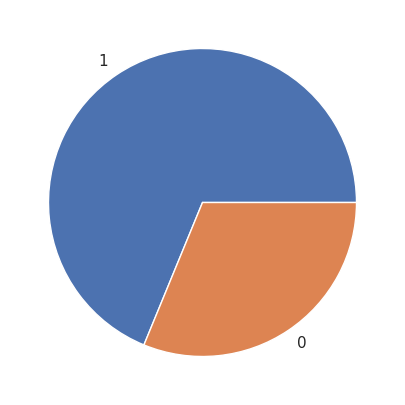

In [12]:
y =df['Loan_Status']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data matrix

In [13]:
X = df.drop(columns=['Loan_Status'])
X.head(20)

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0   LP001002    Male      No          0      Graduate            No   
1   LP001003    Male     Yes          1      Graduate            No   
2   LP001005    Male     Yes          0      Graduate           Yes   
3   LP001006    Male     Yes          0  Not Graduate            No   
4   LP001008    Male      No          0      Graduate            No   
5   LP001011    Male     Yes          2      Graduate           Yes   
6   LP001013    Male     Yes          0  Not Graduate            No   
7   LP001014    Male     Yes         3+      Graduate            No   
8   LP001018    Male     Yes          2      Graduate            No   
9   LP001020    Male     Yes          1      Graduate            No   
10  LP001024    Male     Yes          2      Graduate            No   
11  LP001027    Male     Yes          2      Graduate            No   
12  LP001028    Male     Yes          2      Graduate            No   
13  LP001029    Male      No          0      Graduate            No   
14  LP001030    Male     Yes          2      Graduate            No   
15  LP001032    Male      No          0      Graduate            No   
16  LP001034    Male      No          1  Not Graduate            No   
17  LP001036  Female      No          0      Graduate            No   
18  LP001038    Male     Yes          0  Not Graduate            No   
19  LP001041    Male     Yes          0      Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              5849                0.0           0               360   
1              4583             1508.0         128               360   
2              3000                0.0          66               360   
3              2583             2358.0         120               360   
4              6000                0.0         141               360   
5              5417             4196.0         267               360   
6              2333             1516.0          95               360   
7              3036             2504.0         158               360   
8              4006             1526.0         168               360   
9             12841            10968.0         349               360   
10             3200              700.0          70               360   
11             2500             1840.0         109               360   
12             3073             8106.0         200               360   
13             1853             2840.0         114               360   
14             1299             1086.0          17               120   
15             4950                0.0         125               360   
16             3596                0.0         100               240   
17             3510                0.0          76               360   
18             4887                0.0         133               360   
19             2600             3500.0         115               120   

    Credit_History Property_Area  
0                1         Urban  
1                1         Rural  
2                1         Urban  
3                1         Urban  
4                1         Urban  
5                1         Urban  
6                1         Urban  
7                0     Semiurban  
8                1         Urban  
9                1     Semiurban  
10               1         Urban  
11               1         Urban  
12               1         Urban  
13               1         Rural  
14               1         Urban  
15               1         Urban  
16               1         Urban  
17               0         Urban  
18               1         Rural  
19               1         Urban

In [14]:
X.describe().transpose()

count         mean          std    min      25%     50%  \
ApplicantIncome    612.0  5394.973856  6111.802199  150.0  2875.75  3812.5   
CoapplicantIncome  612.0  1618.918170  2930.501435    0.0     0.00  1149.0   
LoanAmount         612.0   146.441176    84.768780    0.0   100.00   126.0   
Loan_Amount_Term   612.0   339.215686    69.260574   12.0   360.00   360.0   
Credit_History     612.0     0.833333     0.372983    0.0     1.00     1.0   

                       75%      max  
ApplicantIncome    5785.00  81000.0  
CoapplicantIncome  2287.75  41667.0  
LoanAmount          168.00    700.0  
Loan_Amount_Term    360.00    480.0  
Credit_History        1.00      1.0

# Standardize the Data

In [15]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(20)

ValueError: ignored


## The above couldn't execute as it has non-numeric values. Now, we will convert non-numeric values to numeric using label encoding



In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X['Loan_ID'] = label_encoder.fit_transform(X['Loan_ID'])
X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Married'] = label_encoder.fit_transform(X['Married'])
X['Dependents'] = label_encoder.fit_transform(X['Dependents'])
X['Education'] = label_encoder.fit_transform(X['Education'])
X['Self_Employed'] = label_encoder.fit_transform(X['Self_Employed'])
X['CoapplicantIncome'] = label_encoder.fit_transform(X['CoapplicantIncome'])
X['Property_Area'] = label_encoder.fit_transform(X['Property_Area'])

In [17]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(20)


Loan_ID    Gender   Married  Dependents  Education  Self_Employed  \
0  -1.729223  0.473286 -1.373606   -0.710016  -0.529466      -0.393341   
1  -1.723563  0.473286  0.728011    0.105237  -0.529466      -0.393341   
2  -1.717902  0.473286  0.728011   -0.710016  -0.529466       2.542325   
3  -1.712242  0.473286  0.728011   -0.710016   1.888694      -0.393341   
4  -1.706582  0.473286 -1.373606   -0.710016  -0.529466      -0.393341   
5  -1.700921  0.473286  0.728011    0.920490  -0.529466       2.542325   
6  -1.695261  0.473286  0.728011   -0.710016   1.888694      -0.393341   
7  -1.689601  0.473286  0.728011    2.550997  -0.529466      -0.393341   
8  -1.683941  0.473286  0.728011    0.920490  -0.529466      -0.393341   
9  -1.678280  0.473286  0.728011    0.105237  -0.529466      -0.393341   
10 -1.672620  0.473286  0.728011    0.920490  -0.529466      -0.393341   
11 -1.666960  0.473286  0.728011    0.920490  -0.529466      -0.393341   
12 -1.661299  0.473286  0.728011    0.920490  -0.529466      -0.393341   
13 -1.655639  0.473286 -1.373606   -0.710016  -0.529466      -0.393341   
14 -1.649979  0.473286  0.728011    0.920490  -0.529466      -0.393341   
15 -1.644318  0.473286 -1.373606   -0.710016  -0.529466      -0.393341   
16 -1.638658  0.473286 -1.373606    0.105237   1.888694      -0.393341   
17 -1.632998 -2.112886 -1.373606   -0.710016  -0.529466      -0.393341   
18 -1.627337  0.473286  0.728011   -0.710016   1.888694      -0.393341   
19 -1.621677  0.473286  0.728011   -0.710016  -0.529466      -0.393341   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0          0.074348          -0.850033   -1.728950          0.300334   
1         -0.132962          -0.201905   -0.217725          0.300334   
2         -0.392181          -0.850033   -0.949724          0.300334   
3         -0.460465           0.878309   -0.312176          0.300334   
4          0.099074          -0.850033   -0.064241          0.300334   
5          0.003607           1.753282    1.423371          0.300334   
6         -0.501403          -0.191102   -0.607337          0.300334   
7         -0.386286           1.029539    0.136469          0.300334   
8         -0.227447          -0.169498    0.254533          0.300334   
9          1.219299           2.196169    2.391500          0.300334   
10        -0.359431          -0.731209   -0.902499          0.300334   
11        -0.474057           0.219379   -0.442047          0.300334   
12        -0.380227           2.163763    0.632339          0.300334   
13        -0.580004           1.191571   -0.383015          0.300334   
14        -0.670723          -0.536771   -1.528240         -3.167675   
15        -0.072865          -0.850033   -0.253144          0.300334   
16        -0.294585          -0.850033   -0.548305         -1.433671   
17        -0.308668          -0.850033   -0.831660          0.300334   
18        -0.083182          -0.850033   -0.158693          0.300334   
19        -0.457682           1.558843   -0.371209         -3.167675   

    Credit_History  Property_Area  
0         0.447214       1.220811  
1         0.447214      -1.320469  
2         0.447214       1.220811  
3         0.447214       1.220811  
4         0.447214       1.220811  
5         0.447214       1.220811  
6         0.447214       1.220811  
7        -2.236068      -0.049829  
8         0.447214       1.220811  
9         0.447214      -0.049829  
10        0.447214       1.220811  
11        0.447214       1.220811  
12        0.447214       1.220811  
13        0.447214      -1.320469  
14        0.447214       1.220811  
15        0.447214       1.220811  
16        0.447214       1.220811  
17       -2.236068       1.220811  
18        0.447214      -1.320469  
19        0.447214       1.220811

# Observations and variables

In [18]:
observations = list(df.index)
variables = list(df.columns)

# Box and Whisker Plots

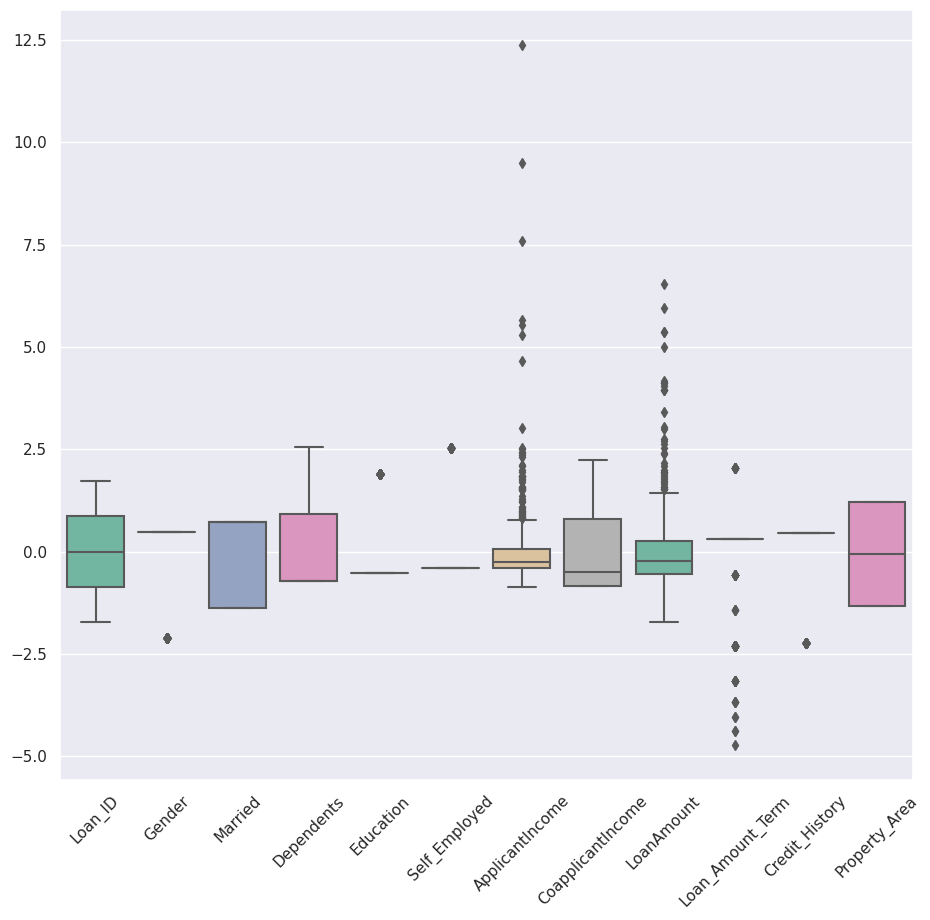

In [19]:
ax = plt.figure(figsize=(11,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

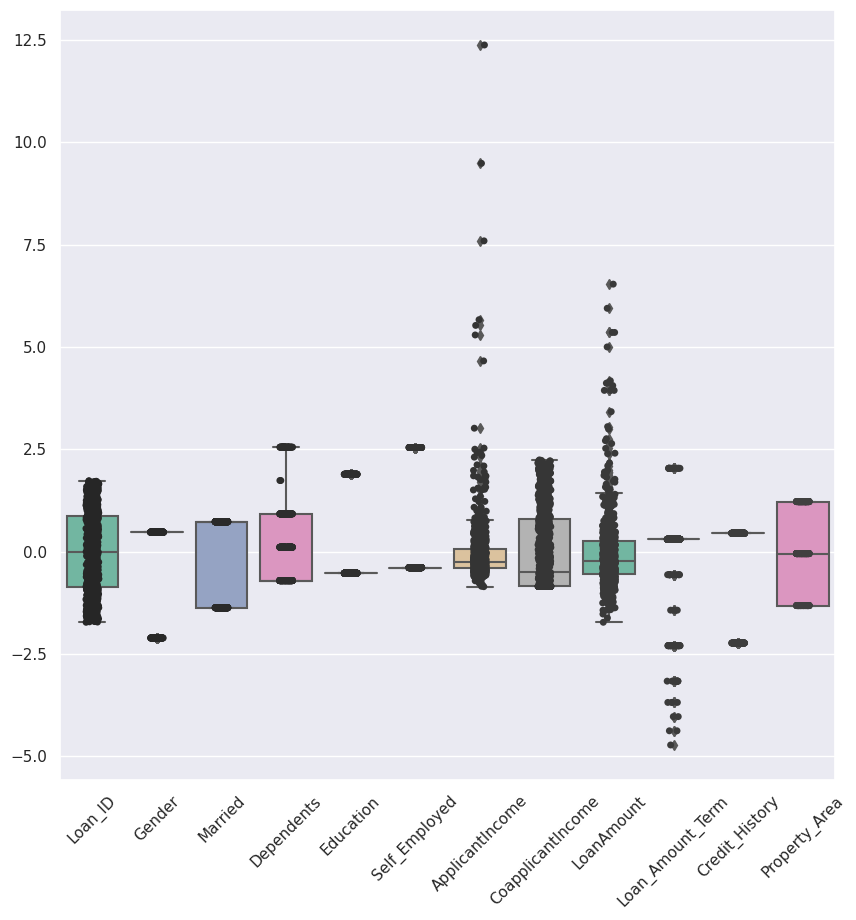

In [20]:
ax = plt.figure(figsize=(10,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

# Correlation Matrix

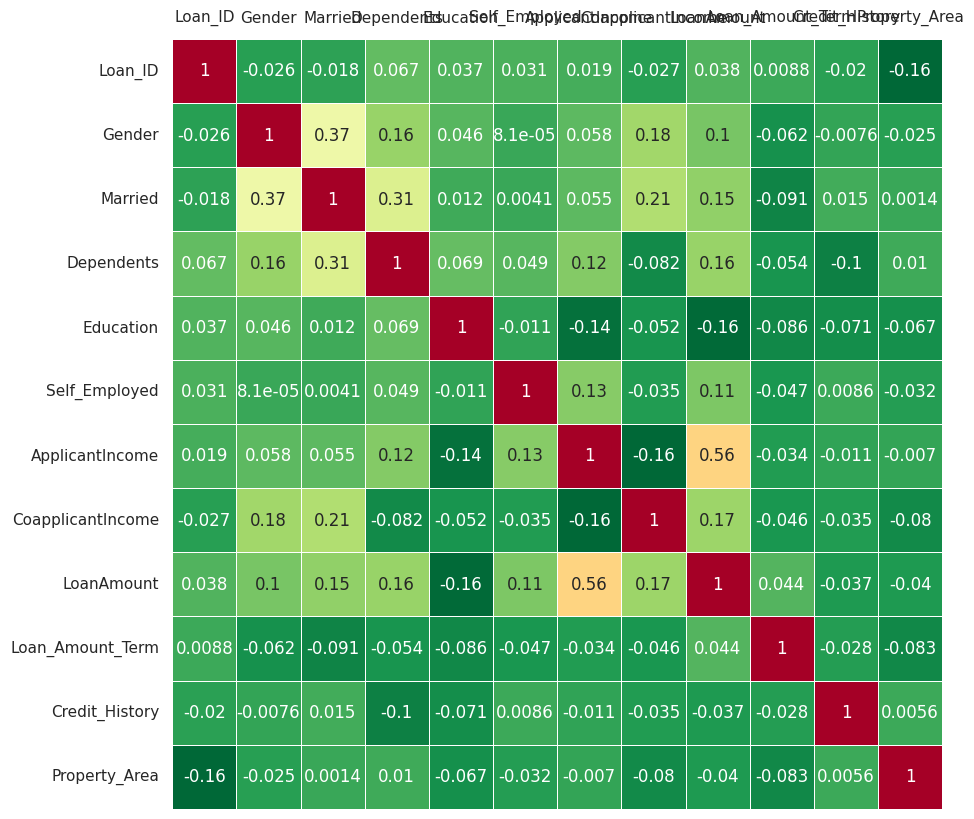

In [21]:
fig1,ax1 = plt.subplots(figsize=(25,10))
ax = sns.heatmap(X.corr(),cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

# Principal Component Analysis

Text(0, 0.5, 'M2')

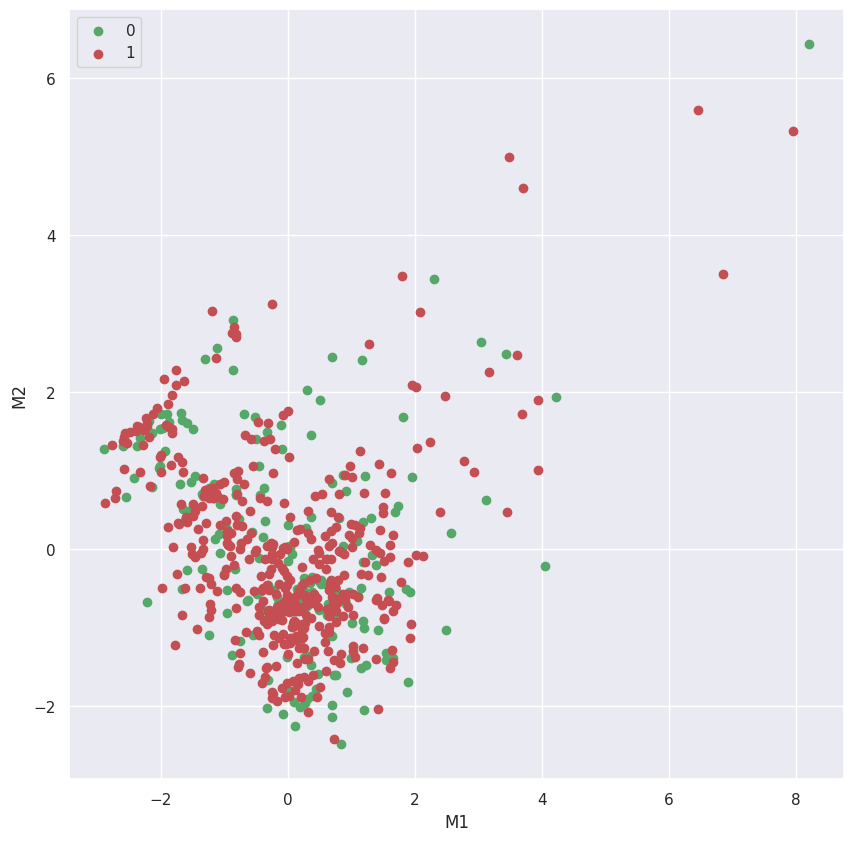

In [22]:
pca = PCA()
M = pca.fit_transform(X)


idx_0= np.where(y == 0)
idx_1 = np.where(y == 1)


plt. figure(figsize=(10,10))
plt.scatter(M[idx_0,0], M[idx_0,1], c='g', label='0')
plt.scatter(M[idx_1,0], M[idx_1,1], c='r', label='1')


plt.legend()
plt.xlabel('M1')
plt.ylabel('M2')

# Eigenvectors

array([[ 0.04388922,  0.06572476,  0.4869877 , -0.35603893, -0.19064368,
        -0.17542946,  0.4409334 , -0.46369552,  0.37795095, -0.08510106,
        -0.05121433,  0.0237683 ],
       [ 0.36627097, -0.39703138, -0.08162224, -0.01913285, -0.02475773,
        -0.12516879, -0.15199468,  0.12575216,  0.27369468, -0.67053663,
         0.34448277, -0.05282731],
       [ 0.43565431, -0.4097645 , -0.05909701,  0.05535521, -0.00995522,
        -0.20729242, -0.07913366, -0.1251961 , -0.08730882,  0.1065654 ,
        -0.74152944, -0.04348949],
       [ 0.36891981, -0.14061781,  0.37122947,  0.26904304,  0.20896507,
        -0.25697799, -0.06520974, -0.222891  , -0.31833773,  0.35150779,
         0.47920332,  0.12553905],
       [-0.09954927, -0.3118674 ,  0.49448123,  0.114315  , -0.04137906,
         0.16019737, -0.08486196,  0.55833443,  0.43498575,  0.31032511,
        -0.05434806,  0.02160485],
       [ 0.14963313,  0.19863793,  0.17868076,  0.0739294 , -0.45805236,
         0.38779738, -

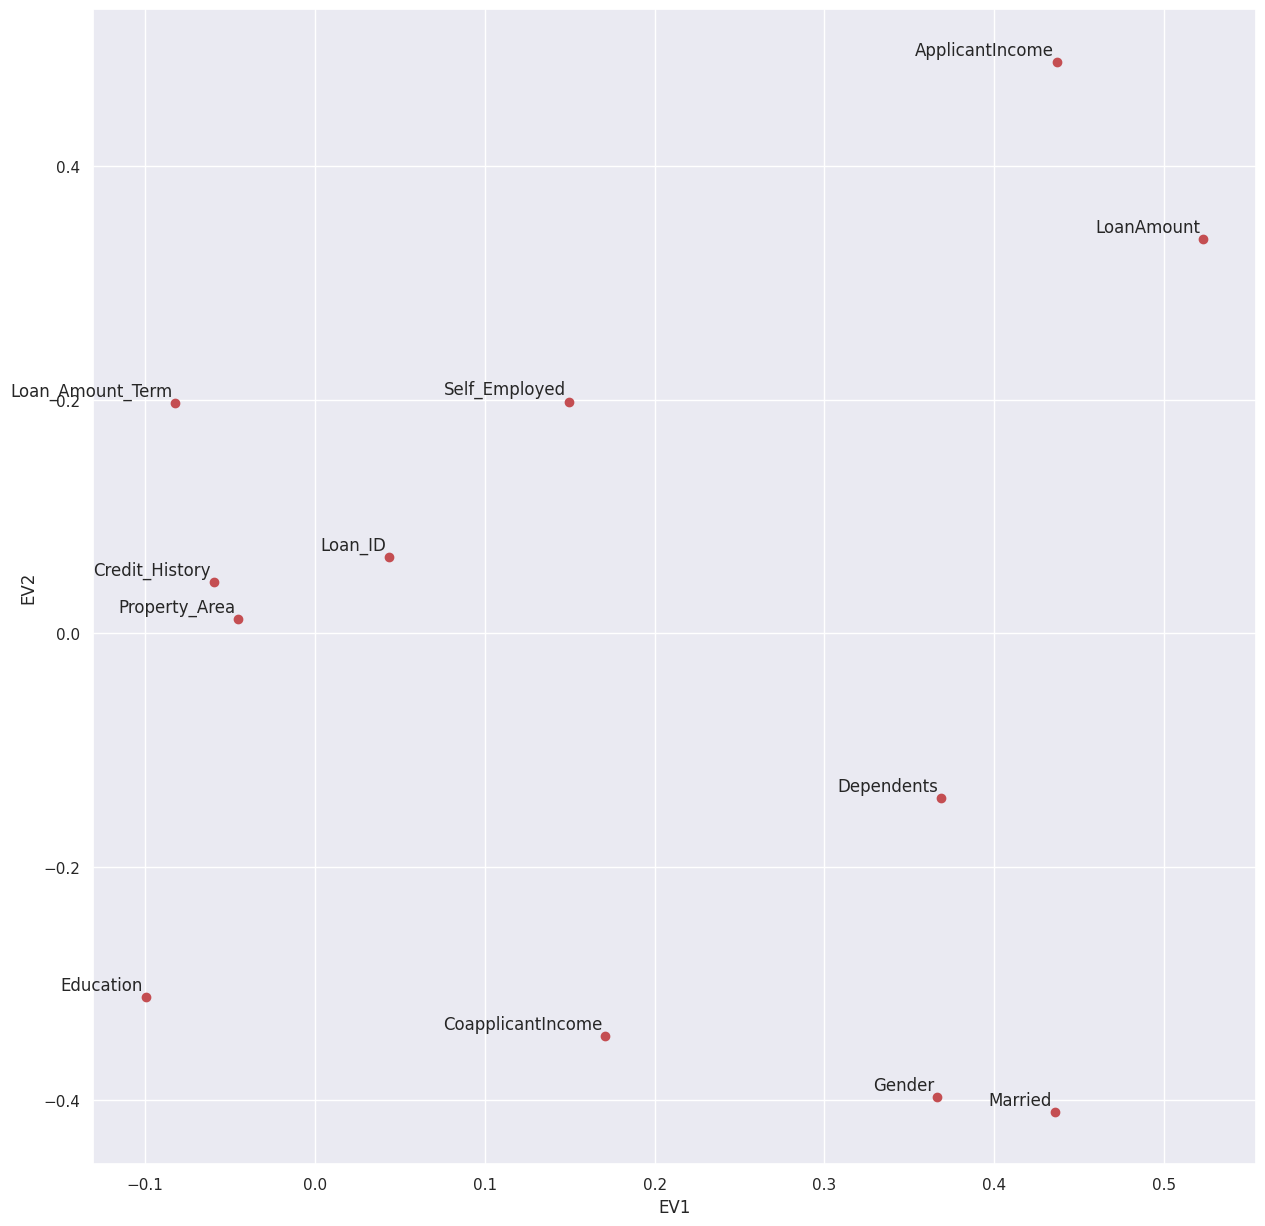

In [23]:
EV = pca.components_.T
plt. figure(figsize=(15,15))

plt.scatter(EV[:,0],EV[:,1],c='r')
plt.xlabel('EV1')
plt.ylabel('EV2')
for label, x, y in zip(variables, EV[:, 0], EV[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
EV

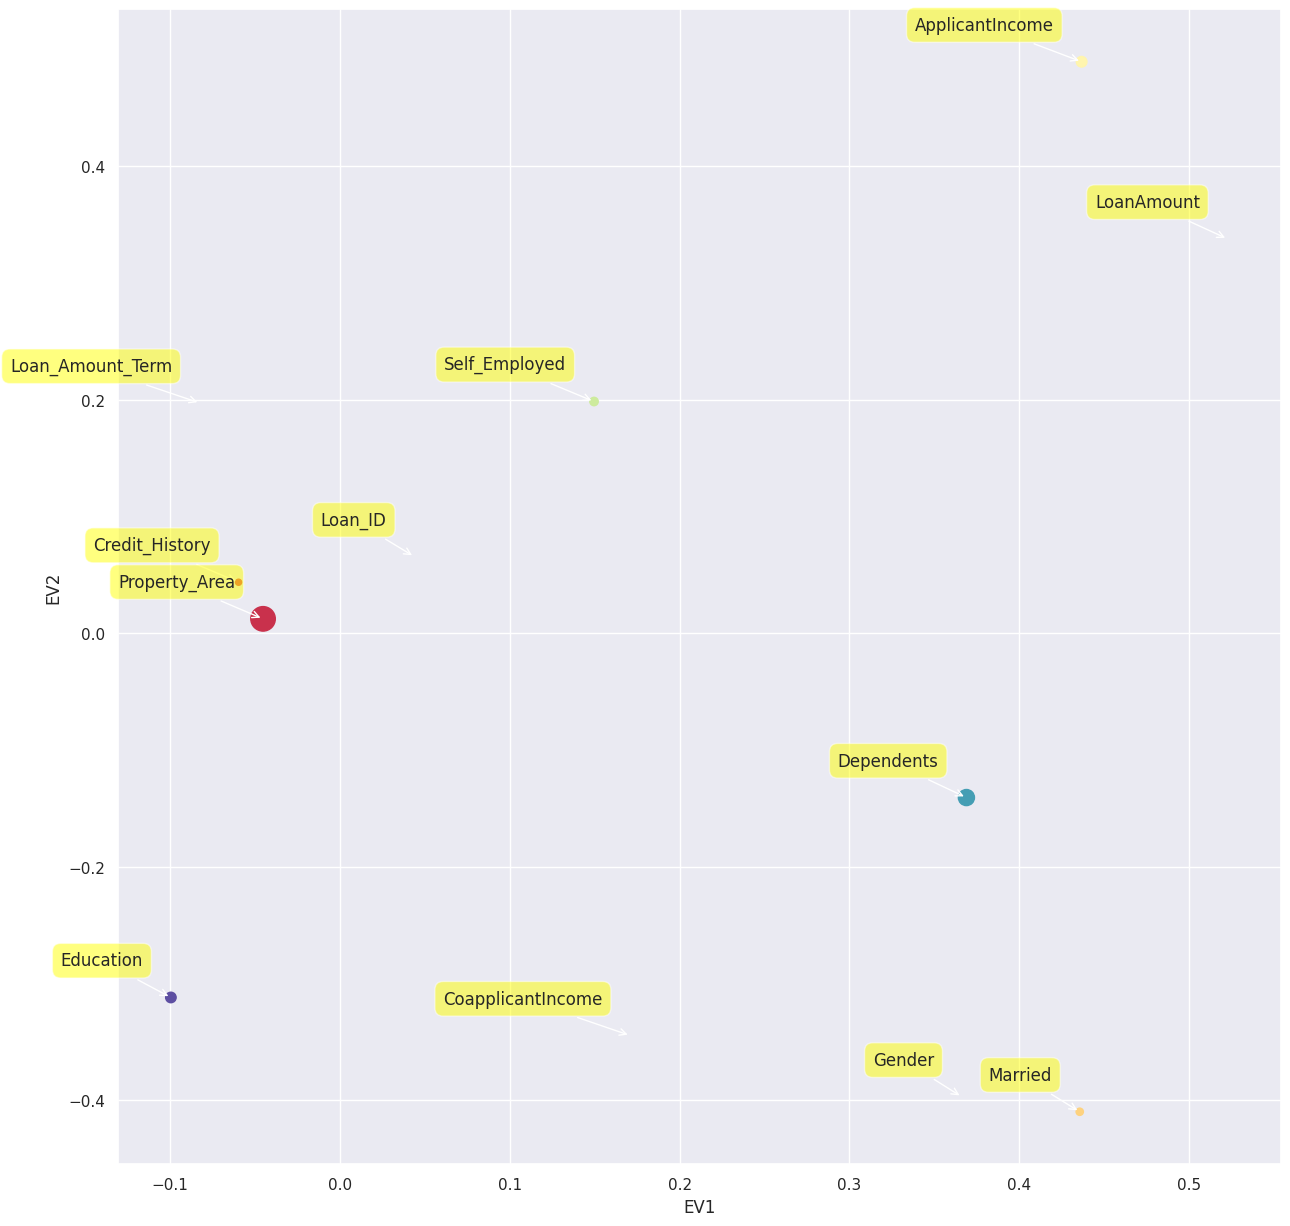

In [24]:
plt. figure(figsize=(15,15))
plt.scatter(EV[:, 0],EV[:, 1], marker='o', c=EV[:, 2], s=EV[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('EV1')
plt.ylabel('EV2')
for label, x, y in zip(variables,EV[:, 0],EV[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


Scree Plot and Eigenvalues


array([1.90486945, 1.50523671, 1.23514899, 1.20004137, 1.04905869,
       0.9807439 , 0.90933683, 0.86963164, 0.75208306, 0.72655323,
       0.55137395, 0.33556212])

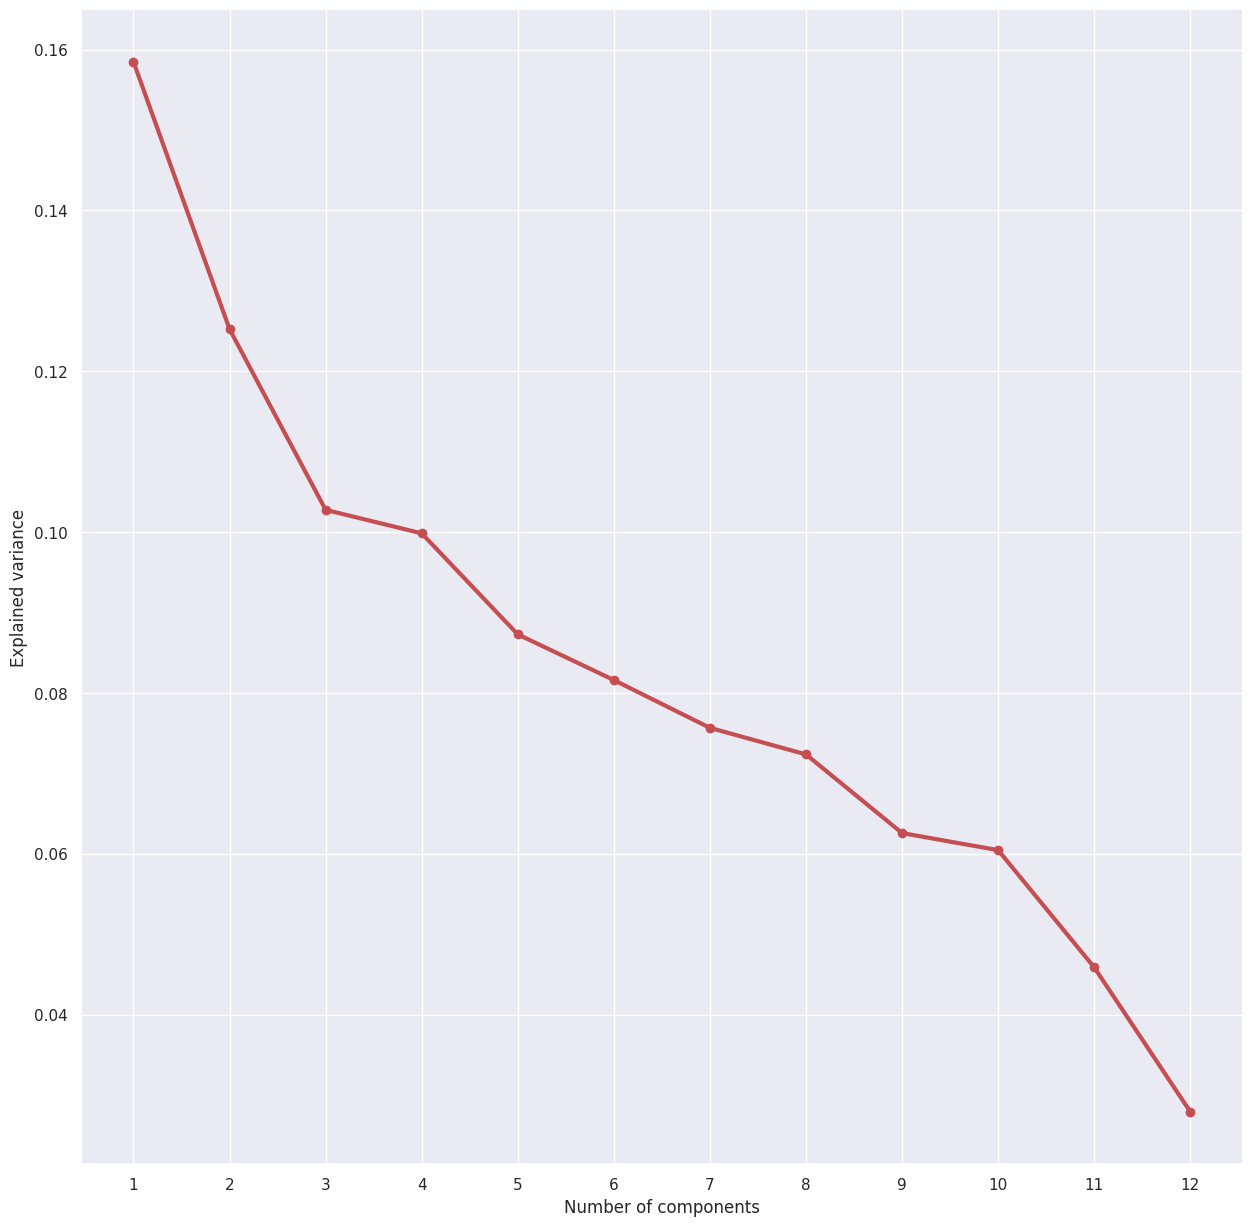

In [25]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,15))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

# Explained variance

Text(0, 0.5, 'Cumulative explained variance')

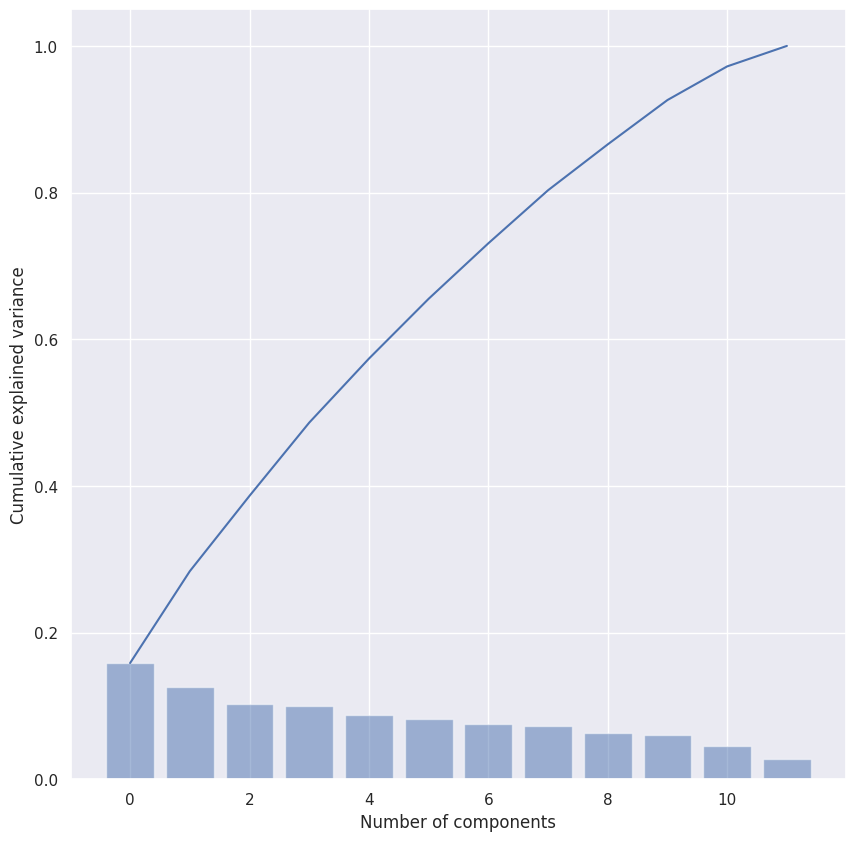

In [26]:
Expv = pca.explained_variance_ratio_
ind = np.arange(len(Expv))
plt. figure(figsize=(10,10))
plt.bar(ind, Expv, align='center', alpha=0.5)
plt.plot(np.cumsum(Expv))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Biplot

array([ 2.87243043e-01, -5.34037210e-01,  4.48026455e-02, -1.70555828e+00,
        8.63335653e-01, -8.45770230e-02, -1.45579335e+00, -1.40606217e+00,
       -5.12253907e-01,  2.02415914e-01, -7.73576075e-01, -1.00124153e+00,
       -1.26176388e+00, -3.08595563e-01, -1.88718274e+00,  7.19404149e-01,
       -6.99432850e-01,  1.31843510e+00, -8.99606060e-01, -1.88273966e+00,
       -8.78083919e-01, -4.09251303e-01, -1.65668602e+00, -1.86348904e+00,
       -1.10729126e+00,  1.06220251e+00, -8.96180796e-01, -1.33537616e+00,
       -6.70234590e-01,  9.06323715e-01, -9.35624126e-01,  3.78930272e-01,
        1.06606267e+00, -8.25914564e-01, -7.66073114e-01,  6.37424494e-01,
       -1.23690300e-01, -4.92615855e-01,  4.40190597e-01,  3.43287890e-02,
       -5.36402047e-01, -7.80929044e-01, -1.12310896e+00,  8.01280682e-01,
       -5.12701168e-01,  1.50355525e-02, -2.44503572e-01,  1.17621571e+00,
       -4.93844305e-01,  1.57359460e+00,  1.63378367e+00, -3.48526973e-01,
        2.41722313e+00, -

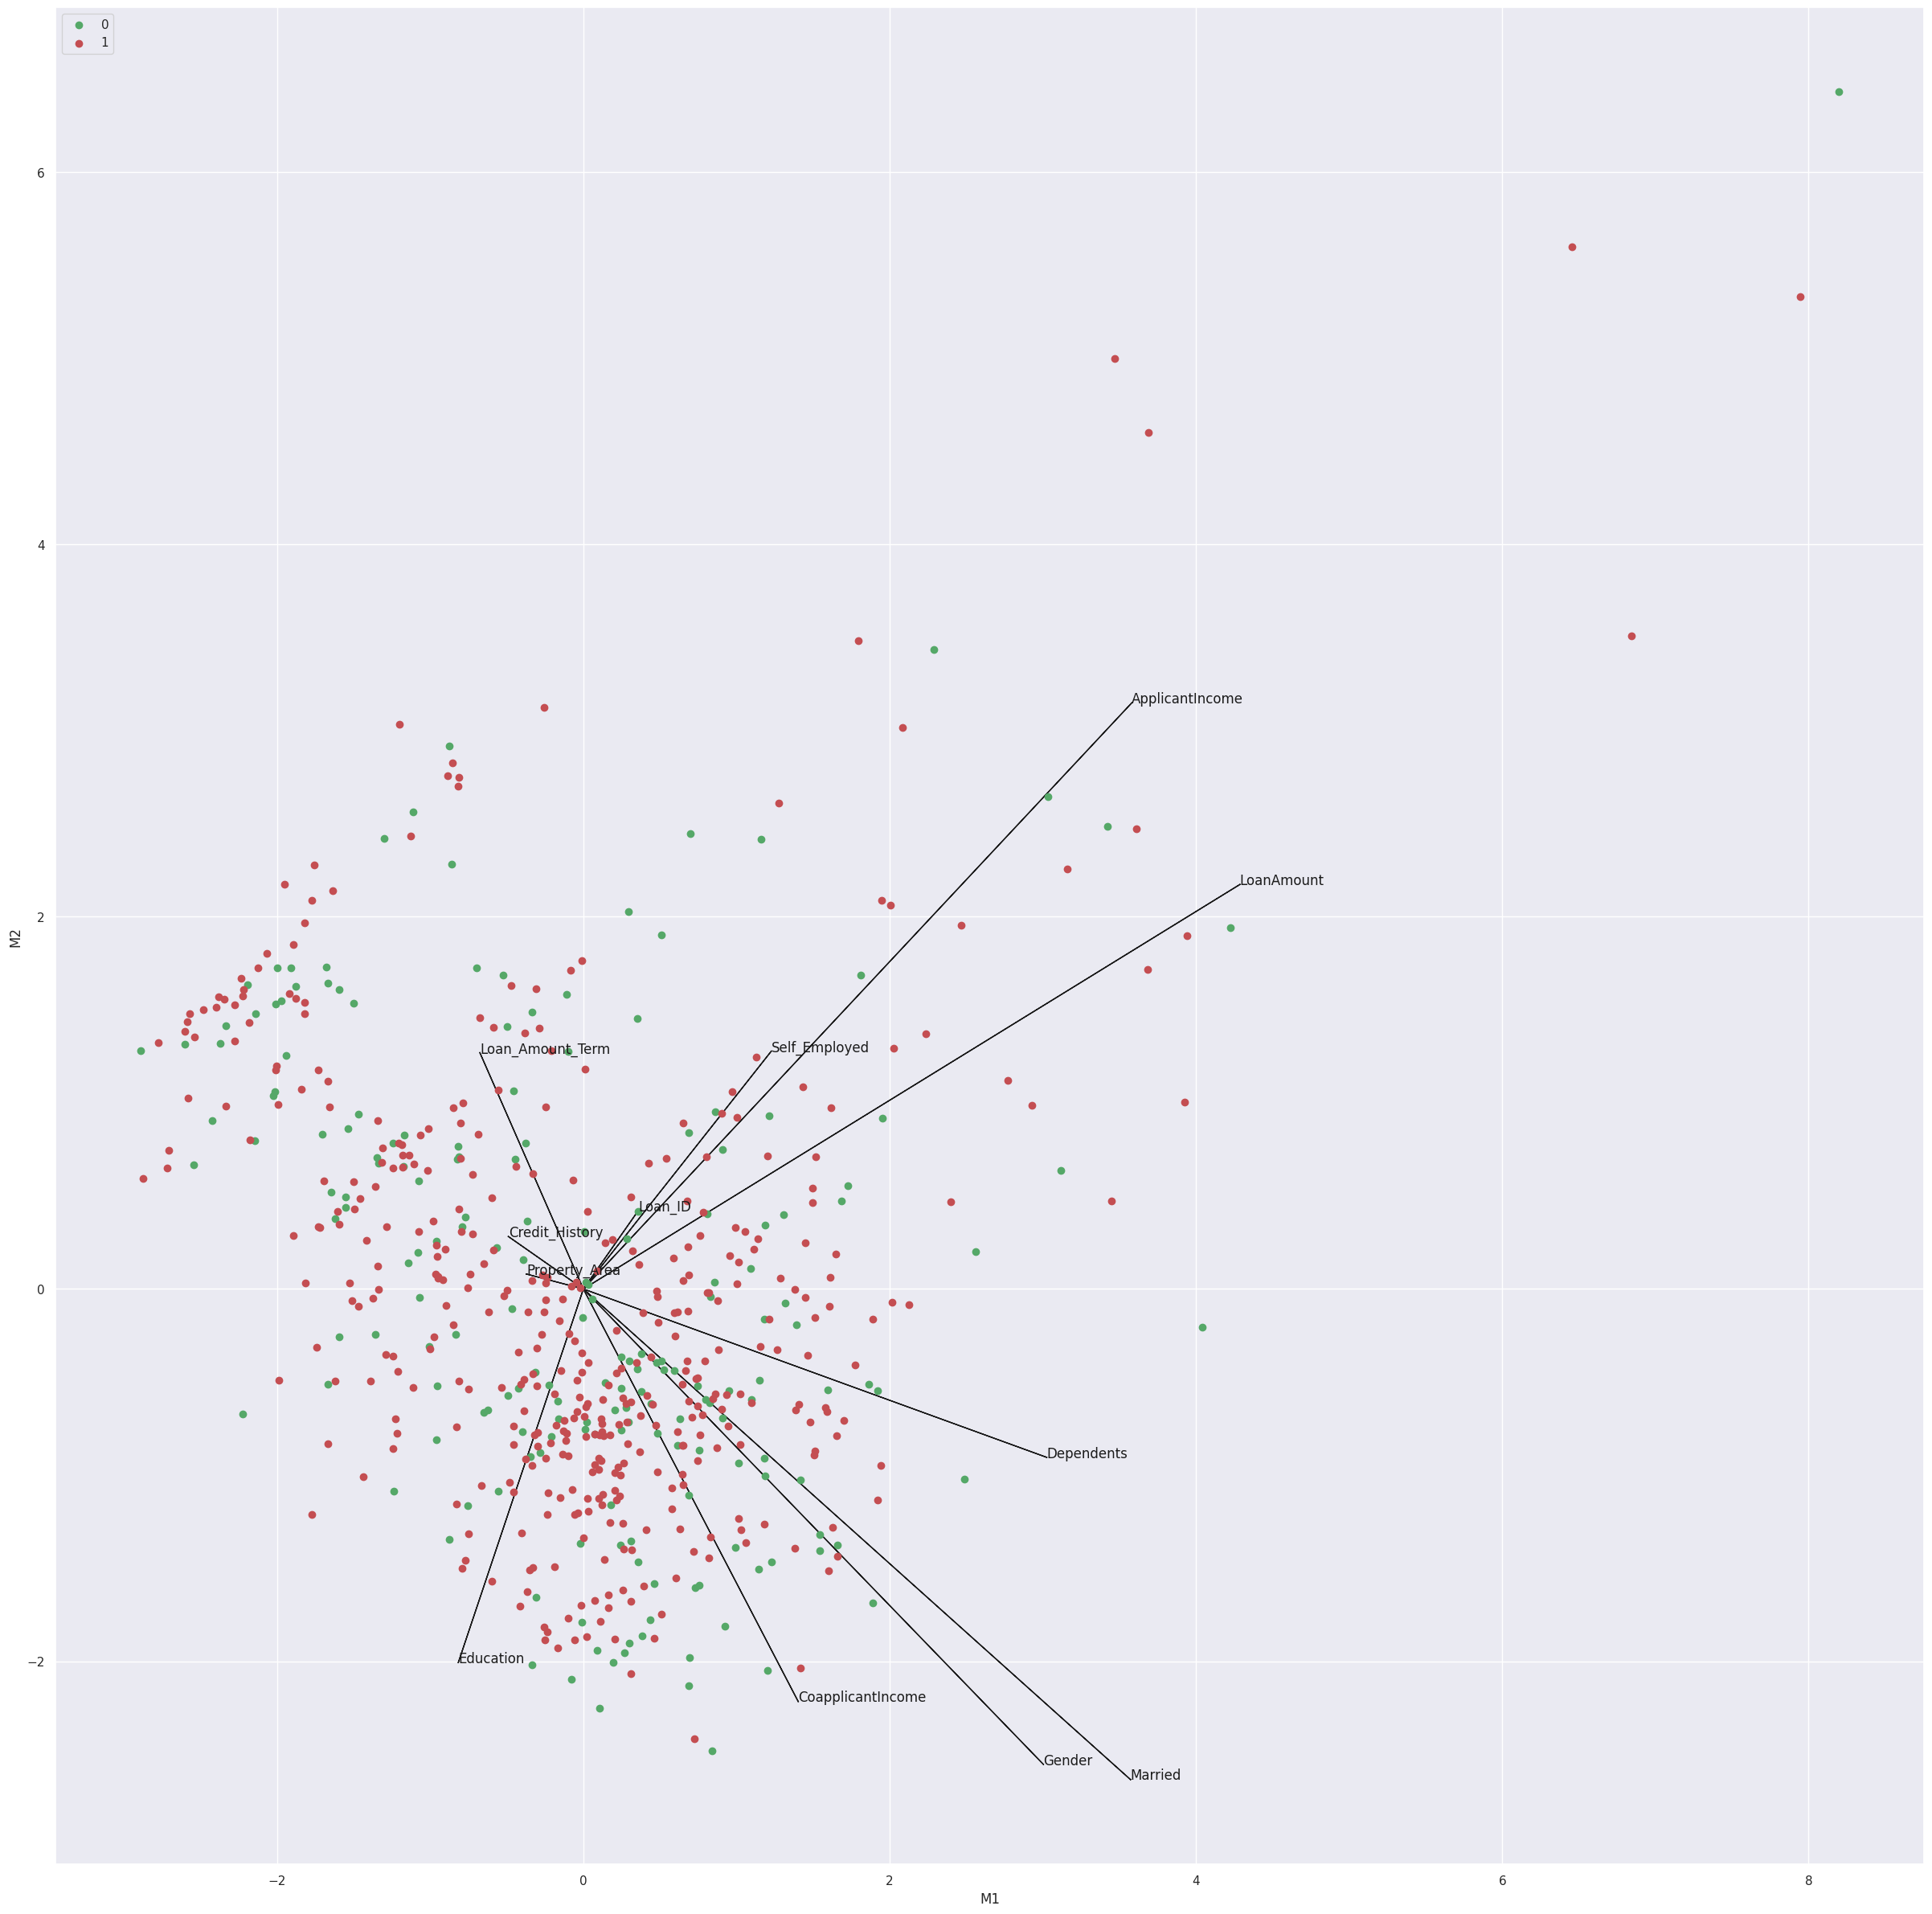

In [27]:
EV1 = EV[:,0]
EV2 = EV[:,1]
M1 = M[:,0]
M2 = M[:,1]

plt. figure(figsize=(30,30))
plt.xlabel('M1')
plt.ylabel('M2')
for i in range(len(EV1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, EV1[i]*max(M1), EV2[i]*max(M2), color='k', width=0.0005, head_width=0.0025)
  plt.text(EV1[i]*max(M1)*1, EV2[i]*max(M2)*1,variables[i], color='k')

plt.scatter(M[idx_0,0], M[idx_0,1], c='g', label='0')
plt.scatter(M[idx_1,0], M[idx_1,1], c='r', label='1')

plt.legend(loc='upper left')
M1
M2

# Using PCA Library

In [28]:
!pip install pca

In [29]:
from pca import pca
# Initializing and keeping all PCs
model = pca()
# Perform Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [11] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[11]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [30]:
# Principal Components are:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -1.892549  0.287243 -1.386186  1.554331  0.404989 -0.384276 -0.697927   
1    0.249454 -0.534037 -0.836213 -0.230539  0.146121 -0.720372 -0.999730   
2   -0.333594  0.044803 -1.081996  1.716532 -0.912210  0.408334 -2.733973   
3   -0.414261 -1.705558 -1.149973  0.891942  0.272600  0.380069 -0.793644   
4   -1.010467  0.863336 -1.565473  1.308647  0.500882 -0.184938 -0.478850   
..        ...       ...       ...       ...       ...       ...       ...   
607 -2.346621  1.554953  1.186931 -1.379791 -0.595058 -0.679747  0.940369   
608  0.828703 -1.331338  2.229150  0.646647 -1.294108 -1.315021  1.535915   
609  1.201199  0.714387  0.125396  0.259040  0.072781 -1.254979  1.025742   
610  1.054325  0.308777  0.530583  0.594241  0.197512 -1.573244  0.864434   
611 -1.300640  2.420144  1.982282 -0.557597  0.086890  2.217848 -0.553502   

          PC8       PC9      PC10      PC11  
0    0.474029  0.043038 -1.177007  0.682878  
1    1.034298 -1.558536 -0.333526 -0.216707  
2   -0.788090  0.182343 -0.727614 -0.787533  
3    1.457682  1.286257  0.852034 -0.435161  
4    0.761094  0.317110 -0.768691  0.838457  
..        ...       ...       ...       ...  
607 -0.571316 -0.718089  0.228118 -0.277689  
608 -1.133056 -2.102144 -0.565231  0.668711  
609 -0.940745  1.403137 -0.252882 -0.417836  
610 -1.281998  1.013732 -0.161938 -0.098079  
611 -2.210145  0.108316 -0.207981 -0.668799  

[612 rows x 11 columns]

# Scatter Plot

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '11 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (15.8% expl.var)', ylabel='PC2 (12.5% expl.var)'>)

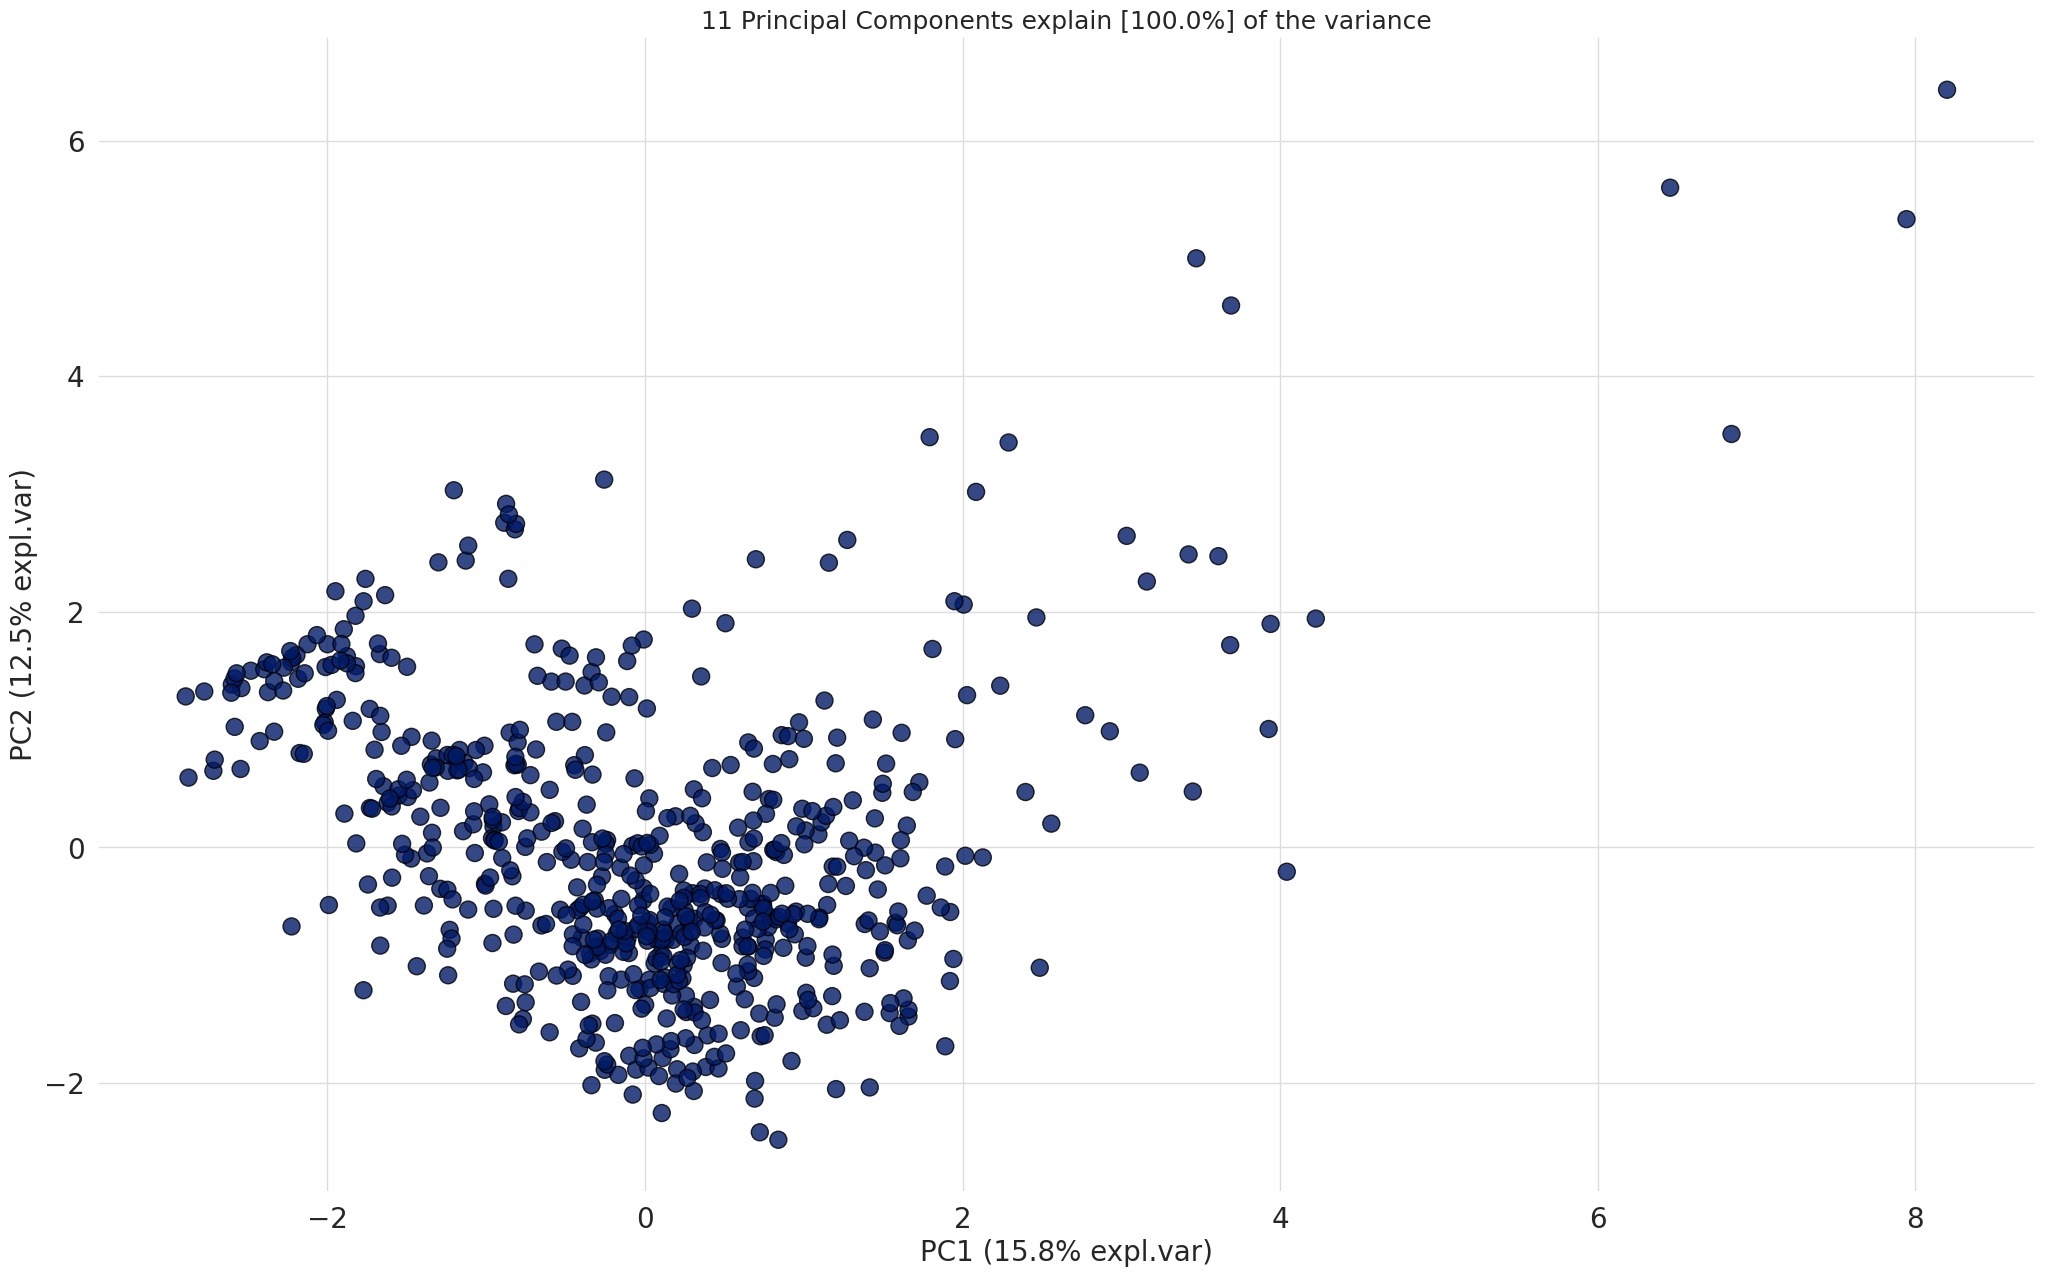

In [31]:
model.scatter(label=True, legend=False)

In [32]:
#Eigen Vectors

A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5       PC6  \
Loan_ID            0.043889  0.065725  0.486988 -0.356039 -0.190644 -0.175429   
Gender             0.366271 -0.397031 -0.081622 -0.019133 -0.024758 -0.125169   
Married            0.435654 -0.409765 -0.059097  0.055355 -0.009955 -0.207292   
Dependents         0.368920 -0.140618  0.371229  0.269043  0.208965 -0.256978   
Education         -0.099549 -0.311867  0.494481  0.114315 -0.041379  0.160197   
Self_Employed      0.149633  0.198638  0.178681  0.073929 -0.458052  0.387797   
ApplicantIncome    0.436763  0.489675  0.026329  0.116937 -0.007661  0.007038   
CoapplicantIncome  0.171034 -0.344515 -0.385913 -0.452386 -0.056535  0.374042   
LoanAmount         0.522787  0.337895 -0.114713 -0.144478  0.060310  0.122025   
Loan_Amount_Term  -0.082388  0.197301 -0.044976 -0.387647  0.488608 -0.386910   
Credit_History    -0.059700  0.043812 -0.274047  0.038989 -0.654892 -0.601576   
Property_Area     -0.045275  0.012465 -0.313900  0.622813  0.182316  0.045382   

                        PC7       PC8       PC9      PC10      PC11  
Loan_ID            0.440933 -0.463696  0.377951 -0.085101 -0.051214  
Gender            -0.151995  0.125752  0.273695 -0.670537  0.344483  
Married           -0.079134 -0.125196 -0.087309  0.106565 -0.741529  
Dependents        -0.065210 -0.222891 -0.318338  0.351508  0.479203  
Education         -0.084862  0.558334  0.434986  0.310325 -0.054348  
Self_Employed     -0.649095 -0.336083  0.076613 -0.009220 -0.017469  
ApplicantIncome    0.140302  0.306238  0.064165 -0.128496 -0.139085  
CoapplicantIncome  0.097405 -0.103291  0.103060  0.367718  0.209425  
LoanAmount         0.123520  0.174199  0.158543  0.248344  0.096219  
Loan_Amount_Term  -0.531561 -0.041873  0.317980  0.120225 -0.043908  
Credit_History    -0.044653  0.155095  0.099763  0.263445  0.145916  
Property_Area      0.120230 -0.344275  0.572069  0.120740  0.016344

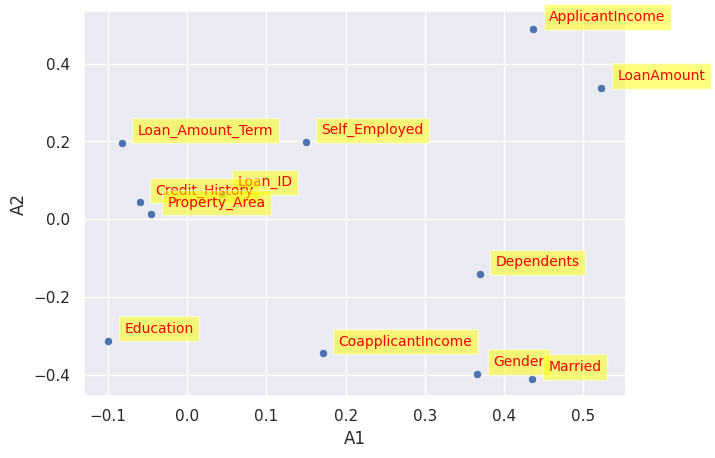

In [33]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

# Scree Plot

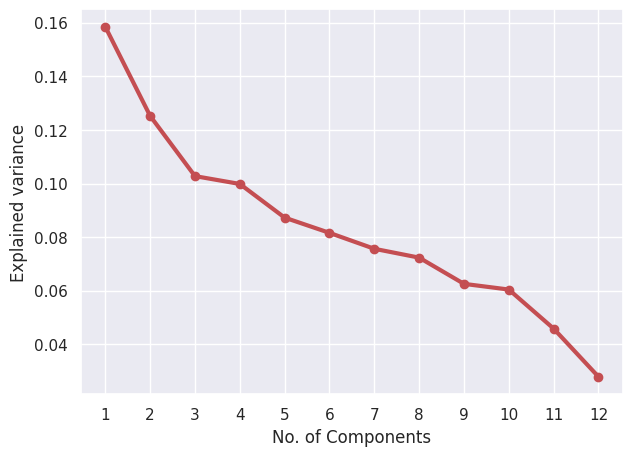

In [34]:
vr= out['variance_ratio']
x = np.arange(len(vr)) + 1
plt.plot(x, vr, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('No. of Components')
plt.ylabel('Explained variance')
plt.show()

# Explained Variance Plot

(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'Cumulative explained variance\n 11 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

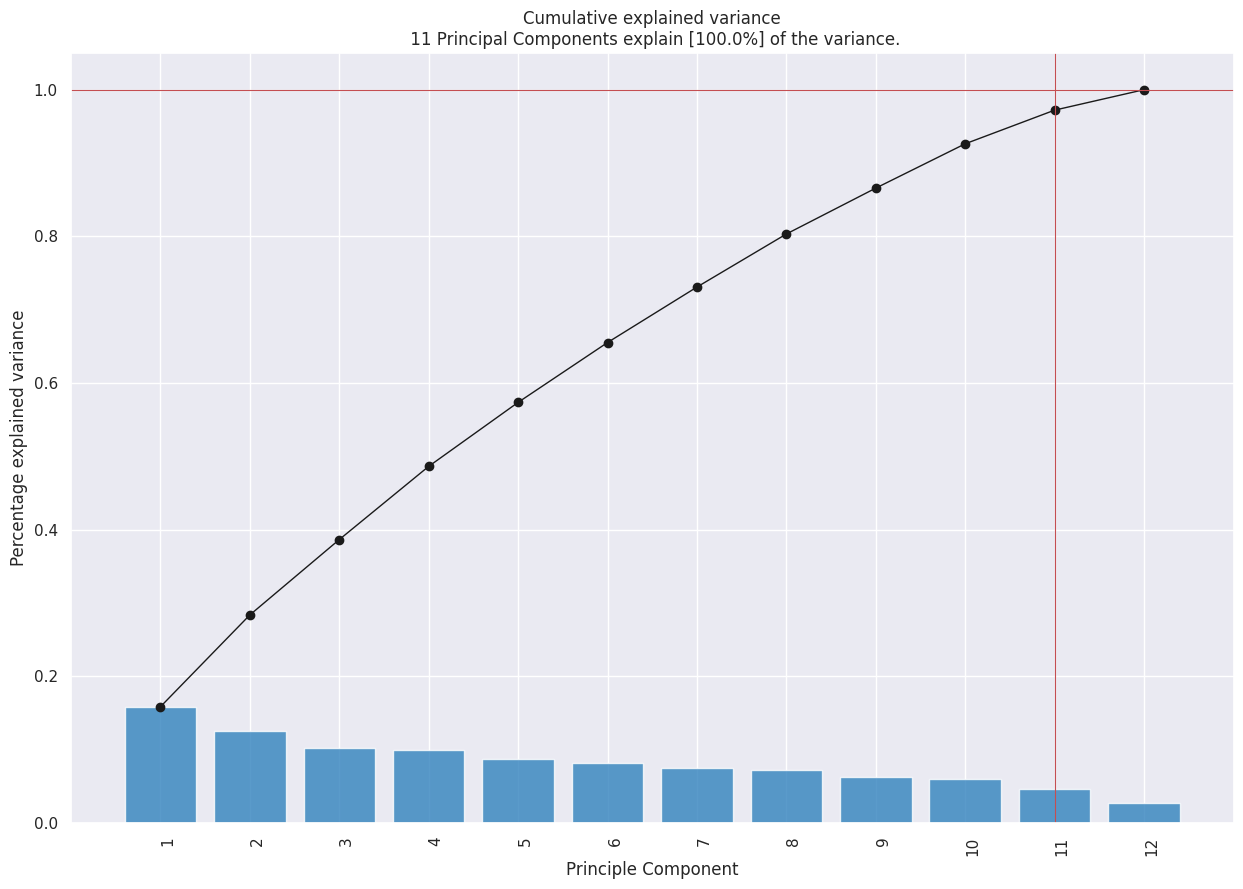

In [35]:
model.plot()

# Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '11 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (15.8% expl.var)', ylabel='PC2 (12.5% expl.var)'>)

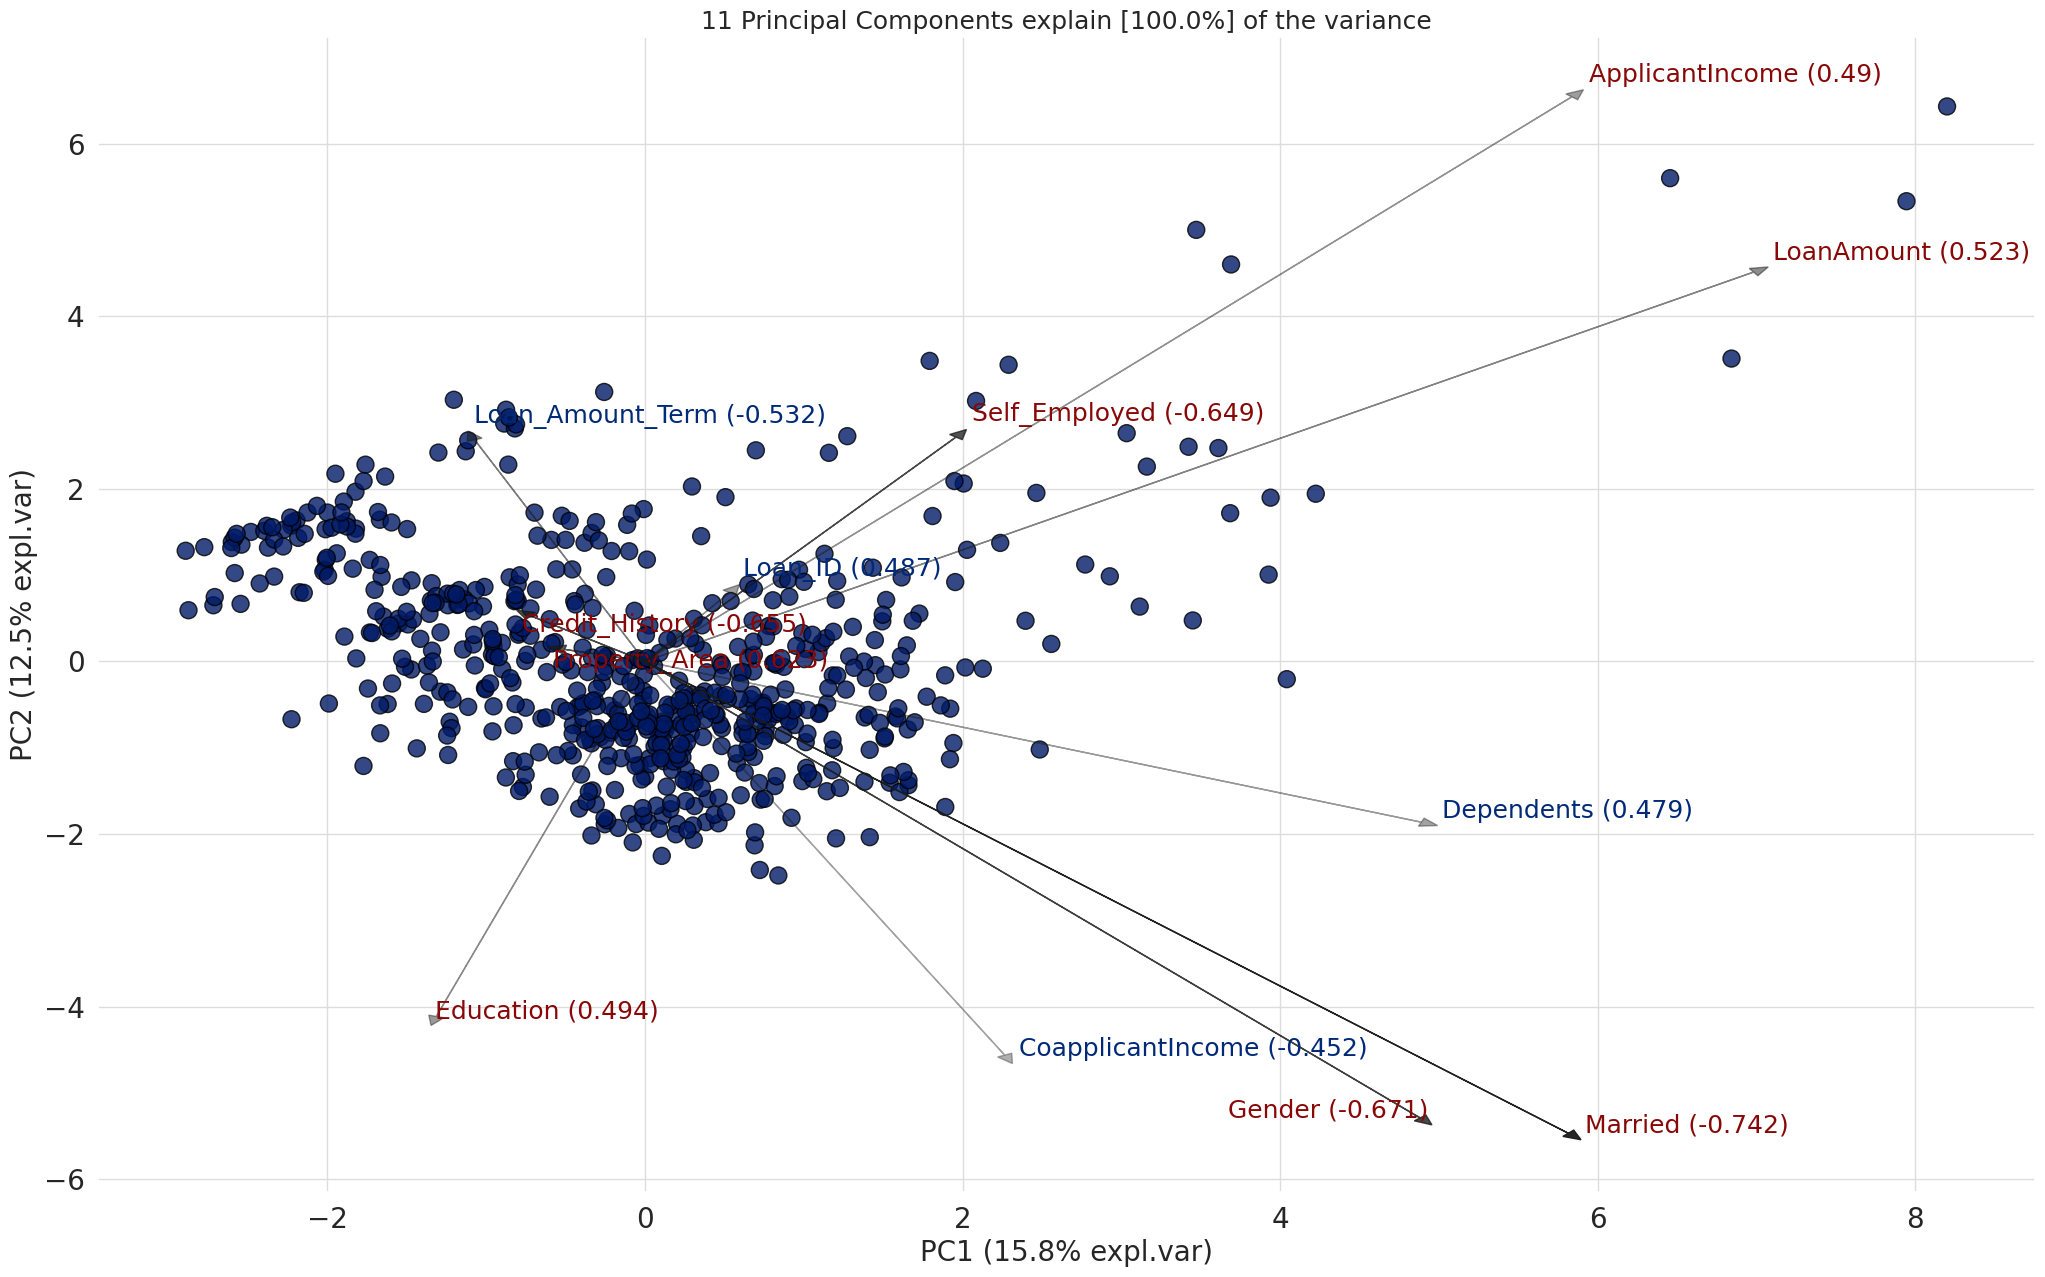

In [36]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


[scatterd] >INFO> Create scatterplot


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '11 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (15.8% expl.var)', ylabel='PC2 (12.5% expl.var)', zlabel='PC3 (10.2% expl.var)'>)

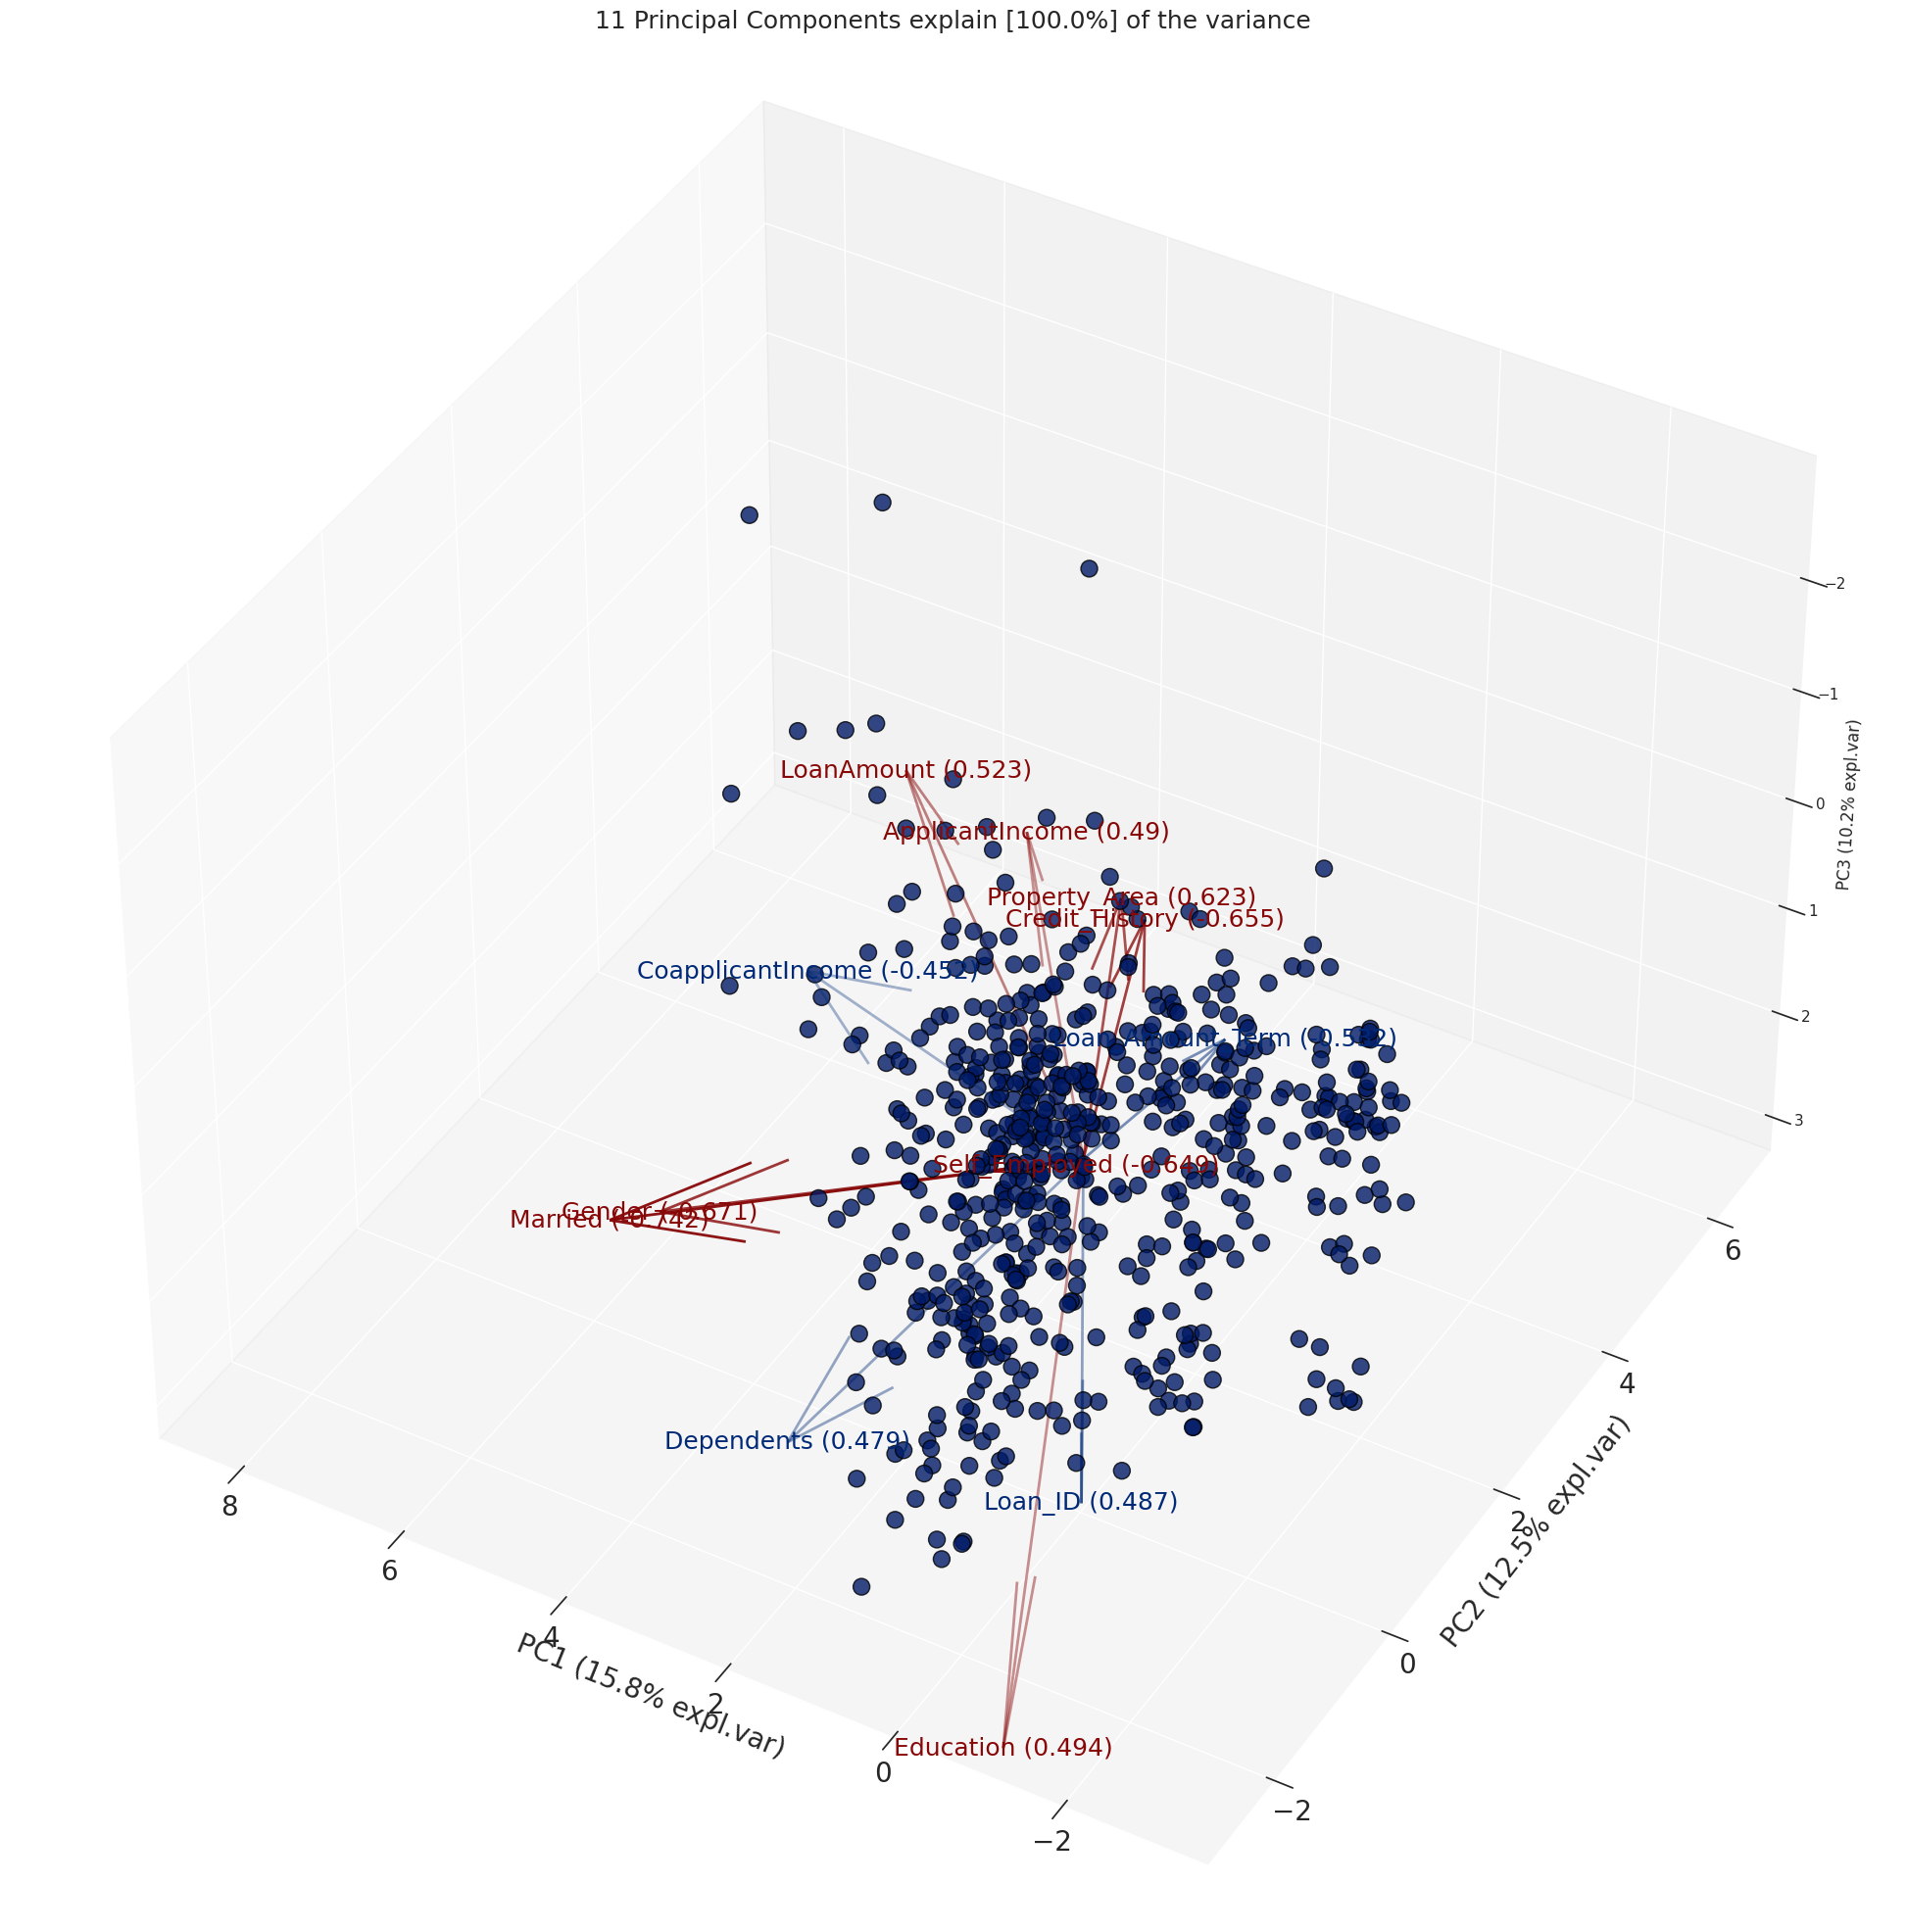

In [37]:
model.biplot3d(legend = False)

# Classification and Comparing the models

In [38]:
from pycaret.utils import version
version()

'3.0.0'

In [39]:
#This can be done Pycaret that we installed at the beginning of the code


data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (551, 13)
Unseen Data For Predictions: (61, 13)


In [40]:
pip install --upgrade pycaret

  Using cached pycaret-3.2.0-py3-none-any.whl (484 kB)
  Attempting uninstall: pycaret
    Found existing installation: pycaret 3.0.0
    Uninstalling pycaret-3.0.0:
      Successfully uninstalled pycaret-3.0.0


In [41]:
from pycaret.classification import *
clf = setup(data=data, target='Loan_Status', train_size=0.7, session_id=123)

##Comparing the models


In [42]:
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [43]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

## **The top three algorithms are Ridge Classifier, Logistic Regression and Naive Bayes**

## **The best algorithm - Ridge Classifier**

In [44]:
ridge= create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune the Model

In [45]:
tuned_ridge=tune_model(ridge)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Tuned Ridge

In [46]:
tuned_ridge

RidgeClassifier(alpha=6.95, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

### Evaluate Ridge

In [47]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### **Second best Model - Logistic** **Regresssion**


In [ ]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## **Tune the model**


In [ ]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_lr

LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



## Evaluate Logistic Regression


In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Third best Model - Naive Bayes

In [49]:
nb= create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tune Naive Bayes Model

In [50]:
tuned_nb = tune_model(nb)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [51]:
tuned_nb

GaussianNB(priors=None, var_smoothing=2e-09)

### Evaluate Naive Bayes

In [52]:
evaluate_model(tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **Create model with K-nearest neighbour**



In [54]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tune model with K-nearest neighbour




In [55]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [56]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

## Evaluate KNN

In [57]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

##  Classification + PCA

In [58]:
!pip install statsmodels --upgrade

In [59]:
clf_pca = setup(data=data, target='Loan_Status', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

## Comparing the models after performing PCA

In [60]:
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [61]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

### After Performing the PCA, the KNN classifier stood as the best, Naive Bayes as the second best and followed by Ridge Classifier

## Tune Best Model


In [62]:
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


### Evaluate the best Model

In [90]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [65]:
#Performing the KNN Classifier
knn_pca = create_model('knn')


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tune KNN

In [87]:
tuned_knn_pca = tune_model(knn_pca)


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [88]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

### Evaluate KNN

In [69]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [91]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [70]:
#Performing the Naive Bayes
nb_pca = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tune Naive Bayes

In [71]:
tuned_nb_pca = tune_model(nb_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [72]:
tuned_nb_pca

GaussianNB(priors=None, var_smoothing=1e-09)

### Evaluate Naive Bayes

In [73]:
evaluate_model(tuned_nb_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [92]:
evaluate_model(tuned_nb_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [74]:
#Performing the Ridge Classifier
ridge_pca = create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune Ridge Classifier

In [75]:
tuned_ridge_pca = tune_model(ridge_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [76]:
tuned_ridge_pca

RidgeClassifier(alpha=5.62, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

### Evaluate Ridge Classifier

In [77]:
evaluate_model(tuned_ridge_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [93]:
evaluate_model(tuned_ridge_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Performing Some more algorhims on the data to further test it

In [78]:
#Performing Linear Discriminant Analysis
lda_pca = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tune Linear Discriminant Analysis

In [79]:
tuned_lda_pca = tune_model(lda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [80]:
tuned_lda_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=0.9, solver='lsqr',
                           store_covariance=False, tol=0.0001)

### Evaluate Linear Discriminant Analysis

In [81]:
evaluate_model(tuned_lda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [94]:
evaluate_model(tuned_lda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [82]:
#Performing Quadratic Discriminant Analysis
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune Quadratic Discriminant Analysis

In [83]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [84]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.98,
                              store_covariance=False, tol=0.0001)

### Evaluate Quadratic Discriminant Analysis

In [85]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [95]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…